In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from scipy import linalg

## 1. Training Neural Network

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #Loading MNIST data
train_images=train_images.astype('float32') #converting image data to float 32 so they can be normaised
test_images=test_images.astype('float32')
train_images /= 255 # normalising images in range 0 to 1
test_images /= 255
#defining model
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)), #28x28 MNIST image input
    keras.layers.Flatten(), #converting 2d image input to 1d array
    keras.layers.Dense(128,activation='relu'), #128 neuron hidden layer
    keras.layers.Dense(10)]) #10 neuron output, one for each digit
#compiling model
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #Our loss function & converting raw logits to probabilities via softmax
optimizer=tf.keras.optimizers.SGD(learning_rate=1.0) #Stochastic Gradient Descent optimiser to minimise the loss function
model.compile(loss=loss, optimizer=optimizer ,metrics=['accuracy']) #compiling model
#training model
history=model.fit(train_images, train_labels,batch_size=100, epochs=30)
#testing model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) #calcualting model predictions, then comparing to image labels to get accuracy
print(f"Test accuracy = {test_acc}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7892 - loss: 0.6791
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9585 - loss: 0.1374
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9680 - loss: 0.1006
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9758 - loss: 0.0801
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0665
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9807 - loss: 0.0599
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9848 - loss: 0.0487
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9864 - loss: 0.0429
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9883 - loss: 0.0349
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9889 - loss: 0.0349
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9903 - loss: 0.0288
E

## Decomposing the MNIST training dataset into its PCA components

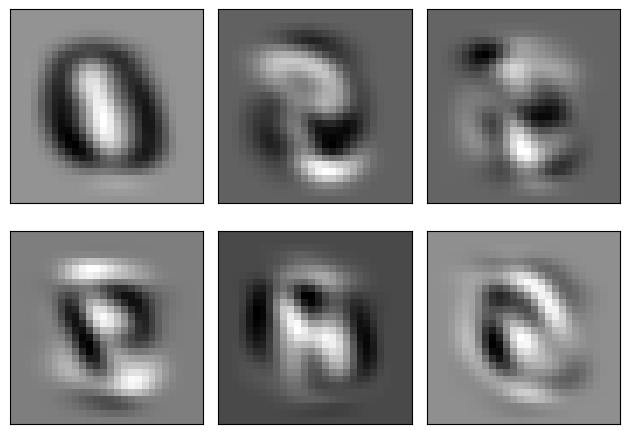

In [9]:
X = np.reshape(train_images, (60000, 784))  #reshaping (flattening) images from 2D 28x28 to 1D 784
mu = np.mean(X, axis=0)   #calculating the mean
x = X - mu    #mean-centering the dataset
rho=np.cov(x,rowvar=False)  #covariance matrix
vals, vecs = linalg.eigh(rho) #calcuating the eigenvalues and eigenvectors
vals = np.flip(vals)  #changing order of elements to ascending
vecs = np.flip(vecs)  #as most important PA's have greatest value

for i in range(2):
    for j in range(3):
        plt.subplot(2, 3, i * 3 + j + 1)  # Create a subplot
        img = np.reshape(vecs[:, i + j * 3], (28, 28))  # Reshape to 28x28
        plt.imshow(img, origin='lower', cmap='binary', interpolation='nearest')  # Plot image
        plt.xticks([])  # Remove x ticks
        plt.yticks([])  # Remove y ticks

plt.tight_layout()  # Adjust spacing
plt.show()


## 3.Applying the PCA to the data set for N-best PCA components (without retraining)

N = 1, Test Accuracy = 0.15880000591278076
N = 5, Test Accuracy = 0.5799000263214111
N = 10, Test Accuracy = 0.8126000165939331
N = 20, Test Accuracy = 0.9456999897956848
N = 50, Test Accuracy = 0.975600004196167
N = 100, Test Accuracy = 0.9787999987602234
N = 200, Test Accuracy = 0.9776999950408936
N = 500, Test Accuracy = 0.9772999882698059
N = 784, Test Accuracy = 0.9771999716758728


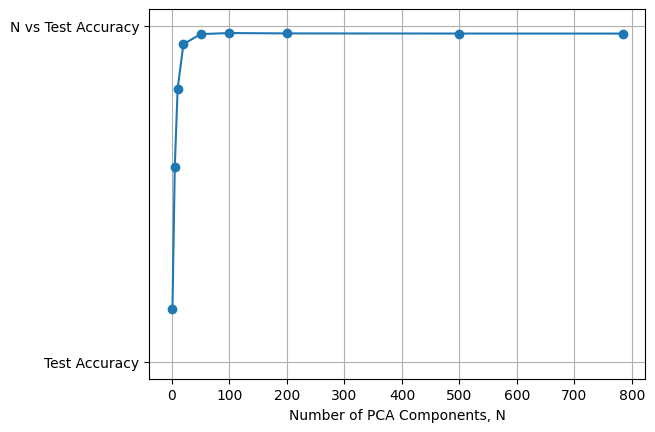

In [4]:
num_tests = 10000   #number of tests
testX = np.reshape(test_images, (num_tests, 784))   #falttening each test image
muTest = np.mean(testX, axis=0)
testx = testX - muTest  #mean centering the dataset
rhoTest = np.cov(testx, rowvar=False)   #calculating covariance matrix
Testvals, Testvecs = linalg.eigh(rhoTest)
Testvecs = np.flip(Testvecs, axis=1)
Testvals = np.flip(Testvals)
N = [1, 5, 10, 20, 50, 100, 200, 500, 784]  #selecting a range of N values from 1 to all of them
test_accuracies = []  #intialising accuracy array
P_Test = np.dot(testx,Testvecs) #project test data onto PCA space

for n in N:
  newImageN = (np.dot(P_Test[:, 0:n], Testvecs.T[0:n, :])) + muTest   #projecting data onto the first n principal components and reconstruct images
  newImageN = np.reshape(newImageN, (num_tests, 28, 28))  #reshaping images back to 28x28
  test_loss, test_acc = model.evaluate(newImageN, test_labels[:num_tests], verbose=0)  #evaluate using our model over the reconstructed images
  test_accuracies.append(test_acc)  #adding model test accuracy to array
  print(f"N = {n}, Test Accuracy = {test_acc}")


plt.plot(N, test_accuracies, marker='o')   #plotting N against model test accuracy
plt.xlabel("Number of PCA Components, N")
plt.plot("Test Accuracy")
plt.plot("N vs Test Accuracy")
plt.grid()
plt.show()


## 4. Applying the PCA to the data set for 100 best PCA components (with retraining)

In [5]:
P=np.dot(x, vecs)  #calculating the projection for the MNIST training images
N=20
newImage100 = (np.dot(P[:,0:N], vecs.T[0:N, :])) + mu   #projecting data onto the first 100 principal components and reconstruct images
newImage100 = np.reshape(newImage100, (60000, 28, 28))  #reshaping images back to 28x28
#Defining a new model
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)), #28x28 MNIST image input
    keras.layers.Flatten(), #converting 2d image input to 1d array
    keras.layers.Dense(128,activation='relu'), #128 neuron hidden layer
    keras.layers.Dense(10)]) #10 neuron output, one for each digit
#compiling model
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #Our loss function & converting raw logits to probabilities via softmax
optimizer=tf.keras.optimizers.SGD(learning_rate=1.0) #Stochastic Gradient Descent optimiser to minimise the loss function
model.compile(loss=loss, optimizer=optimizer ,metrics=['accuracy']) #compiling model
#training model
history=model.fit(newImage100, train_labels,batch_size=100, epochs=30)
#testing model
PCAtest_x = np.reshape(test_images, (10000,784)) -mu  #applying PCA to test images
PCA_P = np.dot(PCAtest_x, vecs[:, :N])  #projectting test images onto PCP space
PCA_test_images = np.dot(PCA_P, vecs[:, :N].T) + mu   #Reconstructing test images
PCA_test_images = np.reshape(PCA_test_images, (10000,28,28))
test_loss, test_acc = model.evaluate(PCA_test_images, test_labels, verbose=2)   #testing model on PCP test images
print(f"Test accuracy after retraining = {test_acc}")




Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7119 - loss: 0.8766
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9170 - loss: 0.2673
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9374 - loss: 0.2066
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9412 - loss: 0.1924
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9468 - loss: 0.1779
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9494 - loss: 0.1671
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9513 - loss: 0.1570
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9539 - loss: 0.1496
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9555 - loss: 0.1429
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9561 - loss: 0.1407
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9571 - loss: 0.1378
Epoch 12/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## 5. Applying the PCA to the data set for 100 best PCA components (without retraining)

N = 1, Test Accuracy = 0.10109999775886536
N = 5, Test Accuracy = 0.2892000079154968
N = 10, Test Accuracy = 0.670799970626831
N = 20, Test Accuracy = 0.9556000232696533
N = 50, Test Accuracy = 0.9520999789237976
N = 100, Test Accuracy = 0.9521999955177307
N = 200, Test Accuracy = 0.9513000249862671
N = 500, Test Accuracy = 0.9516000151634216
N = 784, Test Accuracy = 0.9516000151634216


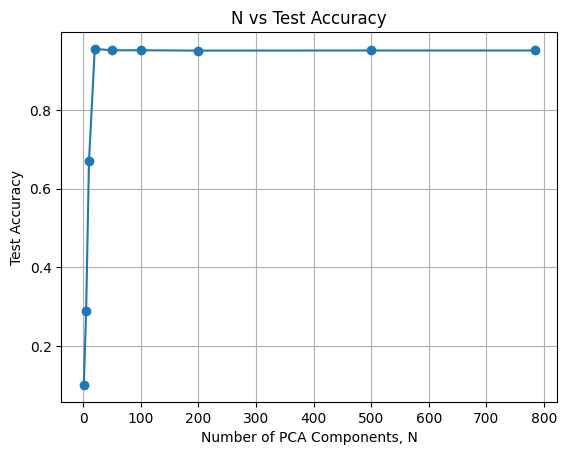

In [6]:
num_tests = 10000   #number of tests
N = [1, 5, 10, 20, 50, 100, 200, 500, 784]  #selecting a range of N values from 1 to all of them
test_accuracies = []  #intialising accuracy array
P_Test = np.dot(testx, vecs) #project test data onto PCA space

for n in N:
  newImageN = (np.dot(P_Test[:, 0:n], vecs.T[0:n, :])) + mu   #projecting data onto the first n principal components and reconstruct images
  newImageN = np.reshape(newImageN, (num_tests, 28, 28))  #reshaping images back to 28x28
  test_loss, test_acc = model.evaluate(newImageN, test_labels[:num_tests], verbose=0)  #evaluate using our model over the reconstructed images
  test_accuracies.append(test_acc)  #adding model test accuracy to array
  print(f"N = {n}, Test Accuracy = {test_acc}")

plt.plot(N, test_accuracies, marker='o')   #plotting N against model test accuracy
plt.xlabel("Number of PCA Components, N")
plt.ylabel("Test Accuracy")
plt.title("N vs Test Accuracy")
plt.grid()
plt.show()

once N>20, the accuracy stays approx. constant at 95%.

## 6. Repeating steps 4 and 5 using a network trained with the best 20 components

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7259 - loss: 0.8761
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9156 - loss: 0.2707
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9348 - loss: 0.2103
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9401 - loss: 0.1955
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9449 - loss: 0.1807
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9500 - loss: 0.1658
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9519 - loss: 0.1630
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9511 - loss: 0.1594
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9524 - loss: 0.1598
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9527 - loss: 0.1547
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9536 - loss: 0.1528
Epoch 12/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

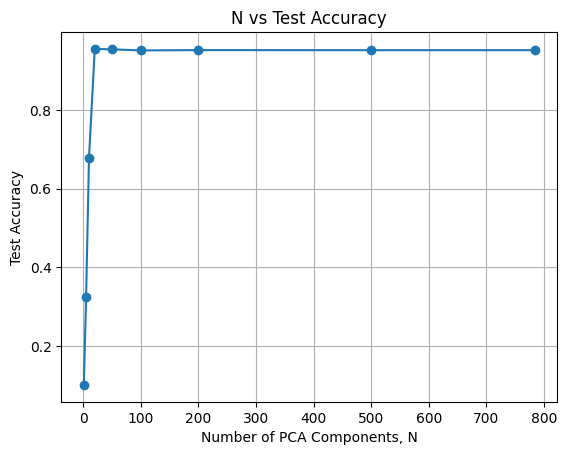

In [8]:
P=np.dot(x, vecs)  #calculating the projection for the MNIST training images
N=20
newImage20 = (np.dot(P[:,0:N], vecs.T[0:N, :])) + mu   #projecting data onto the first 20 principal components and reconstruct images
newImage20 = np.reshape(newImage100, (60000, 28, 28))  #reshaping images back to 28x28
#Defining a new model for N=20
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)), #28x28 MNIST image input
    keras.layers.Flatten(), #converting 2d image input to 1d array
    keras.layers.Dense(128,activation='relu'), #128 neuron hidden layer
    keras.layers.Dense(10)]) #10 neuron output, one for each digit
#compiling model
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #Our loss function & converting raw logits to probabilities via softmax
optimizer=tf.keras.optimizers.SGD(learning_rate=1.0) #Stochastic Gradient Descent optimiser to minimise the loss function
model.compile(loss=loss, optimizer=optimizer ,metrics=['accuracy']) #compiling model
#training model
history=model.fit(newImage20, train_labels,batch_size=100, epochs=30)
#testing model
PCAtest_x = np.reshape(test_images, (10000,784)) -mu  #applying PCA to test images
PCA_P = np.dot(PCAtest_x, vecs[:, :N])  #projectting test images onto new PCP space
PCA_test_images = np.dot(PCA_P, vecs[:, :N].T) + mu   #Reconstructing test images
PCA_test_images = np.reshape(PCA_test_images, (10000,28,28))
test_loss, test_acc = model.evaluate(PCA_test_images, test_labels, verbose=2)   #testing model on PCP test images
print(f"Test accuracy after retraining = {test_acc}")
num_tests = 10000   #number of tests
N = [1, 5, 10, 20, 50, 100, 200, 500, 784]  #selecting a range of N values from 1 to all of them
test_accuracies2 = []  #intialising accuracy array
P_Test = np.dot(testx, vecs) #project test data onto PCA space

for n in N:
  newImageN = (np.dot(P_Test[:, 0:n], vecs.T[0:n, :])) + mu   #projecting data onto the first n principal components and reconstruct images
  newImageN = np.reshape(newImageN, (num_tests, 28, 28))  #reshaping images back to 28x28
  test_loss, test_acc = model.evaluate(newImageN, test_labels[:num_tests], verbose=0)  #evaluate using our model over the reconstructed images
  test_accuracies2.append(test_acc)  #adding model test accuracy to array
  print(f"N = {n}, Test Accuracy = {test_acc}")

plt.plot(N, test_accuracies2, marker='o')   #plotting N against model test accuracy
plt.xlabel("Number of PCA Components, N")
plt.ylabel("Test Accuracy")
plt.title("N vs Test Accuracy")
plt.grid()
plt.show()



Again, once N>20, the accuracy stays approx. constant at 95%.